In [58]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
import pickle
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('data/survey_results_public.csv')

In [3]:
df

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

In [4]:
df.MainBranch.unique()

array(['I am a developer by profession',
       'I am a student who is learning to code',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'None of these'], dtype=object)

In [5]:
df.Age.value_counts()

25-34 years old       32568
18-24 years old       20993
35-44 years old       15183
45-54 years old        5472
Under 18 years old     5376
55-64 years old        1819
Prefer not to say       575
65 years or older       421
Name: Age, dtype: int64

In [6]:
df = df[df.ConvertedCompYearly.notnull()].reset_index(drop=True)

In [7]:
df.OrgSize.nunique()

10

In [8]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment","Age","Gender","OrgSize","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Age,Gender,OrgSize,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",25-34 years old,Man,20 to 99 employees,62268.0
1,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,25-34 years old,Man,10 to 19 employees,51552.0
2,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,25-34 years old,Man,10 to 19 employees,46482.0
3,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,25-34 years old,Man,"1,000 to 4,999 employees",77290.0
4,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,25-34 years old,Man,100 to 499 employees,17748.0


In [9]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Age,Gender,OrgSize,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",25-34 years old,Man,20 to 99 employees,62268.0
1,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,25-34 years old,Man,10 to 19 employees,51552.0
2,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,25-34 years old,Man,10 to 19 employees,46482.0
3,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,25-34 years old,Man,"1,000 to 4,999 employees",77290.0
4,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,25-34 years old,Man,100 to 499 employees,17748.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 46843
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Age           46735 non-null  object 
 5   Gender        46669 non-null  object 
 6   OrgSize       46792 non-null  object 
 7   Salary        46844 non-null  float64
dtypes: float64(1), object(7)
memory usage: 3.2+ MB


In [11]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Age             0
Gender          0
OrgSize         0
Salary          0
dtype: int64

In [12]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40026 entries, 1 to 46843
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40026 non-null  object 
 1   EdLevel       40026 non-null  object 
 2   YearsCodePro  40026 non-null  object 
 3   Age           40026 non-null  object 
 4   Gender        40026 non-null  object 
 5   OrgSize       40026 non-null  object 
 6   Salary        40026 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.4+ MB


In [13]:
df['Country'].value_counts()

United States of America                                9108
India                                                   3371
Germany                                                 2744
United Kingdom of Great Britain and Northern Ireland    2594
Canada                                                  1545
                                                        ... 
Dominica                                                   1
Libyan Arab Jamahiriya                                     1
Monaco                                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [14]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [15]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   10680
United States of America                                 9108
India                                                    3371
Germany                                                  2744
United Kingdom of Great Britain and Northern Ireland     2594
Canada                                                   1545
France                                                   1389
Brazil                                                   1337
Spain                                                     884
Netherlands                                               831
Australia                                                 824
Poland                                                    775
Italy                                                     755
Russian Federation                                        739
Sweden                                                    732
Turkey                                                    457
Switzerl

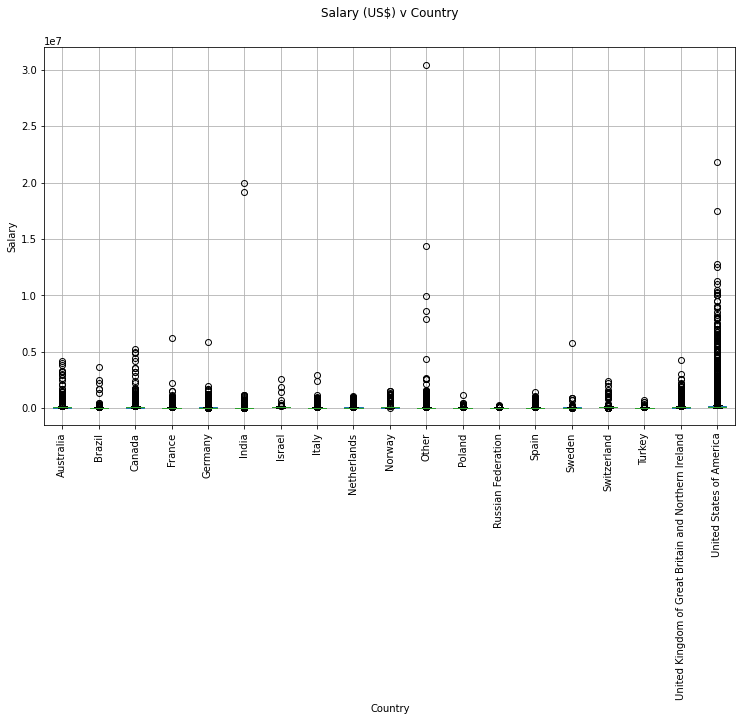

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [17]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

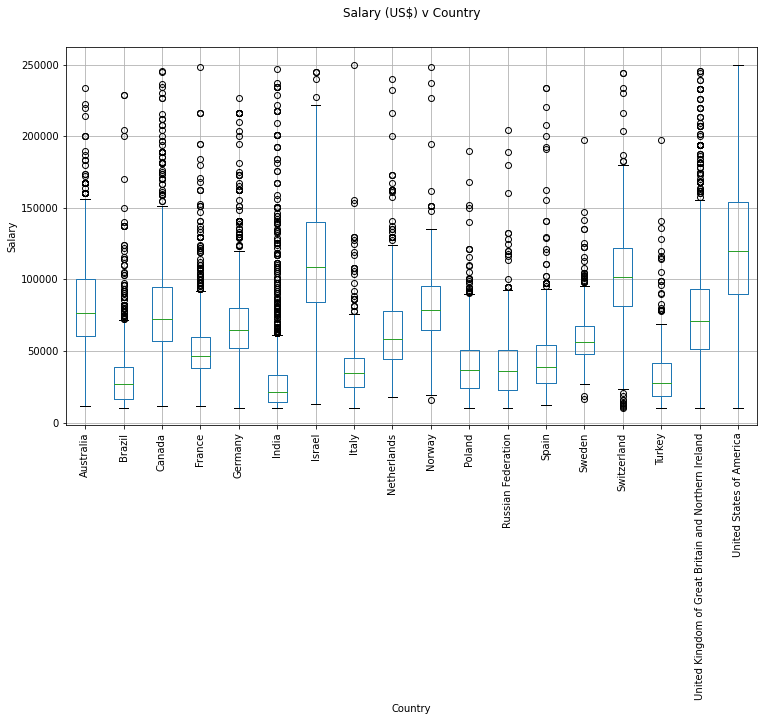

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [19]:
df["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '26', '34', '11', '25',
       '24', '22', '13', '9', '7', '39', '20', '27', '23', '30', '19',
       '35', '33', '37', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [20]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [21]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [22]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [23]:
def clean_gender(x):
    if 'Non-binary' in x:
        return 'Non-binary'
    if 'Woman' in x:
        return 'Woman'
    if 'Man' in x:
        return 'Man'
    if 'Or' in x:
        return 'Prefer not to say'
    return x

df['Gender'] = df['Gender'].apply(clean_gender)

In [24]:
df["Gender"].unique()

array(['Man', 'Woman', 'Prefer not to say', 'Non-binary'], dtype=object)

In [25]:
df

,Country,EdLevel,YearsCodePro,Age,Gender,OrgSize,Salary
1,Sweden,Master’s degree,4.0,25-34 years old,Man,10 to 19 employees,51552.0
2,Spain,Bachelor’s degree,5.0,25-34 years old,Man,10 to 19 employees,46482.0
3,Germany,Master’s degree,6.0,25-34 years old,Man,"1,000 to 4,999 employees",77290.0
4,Turkey,Bachelor’s degree,2.0,25-34 years old,Man,100 to 499 employees,17748.0
5,Canada,Bachelor’s degree,6.0,25-34 years old,Man,500 to 999 employees,46135.0
...,...,...,...,...,...,...,...
46835,United States of America,Master’s degree,21.0,45-54 years old,Man,10 to 19 employees,125000.0
46837,Canada,Bachelor’s degree,0.5,18-24 years old,Woman,"10,000 or more employees",80169.0
46839,United States of America,Bachelor’s degree,5.0,25-34 years old,Man,20 to 99 employees,160500.0
46841,United States of America,Less than a Bachelors,4.0,25-34 years old,Man,"10,000 or more employees",90000.0


In [26]:
df.OrgSize.unique()

array(['10 to 19 employees', '1,000 to 4,999 employees',
       '100 to 499 employees', '500 to 999 employees',
       '5,000 to 9,999 employees', '2 to 9 employees',
       '20 to 99 employees', '10,000 or more employees', 'I don’t know',
       'Just me - I am a freelancer, sole proprietor, etc.'], dtype=object)

In [27]:
df.columns

Index(['Country', 'EdLevel', 'YearsCodePro', 'Age', 'Gender', 'OrgSize',
       'Salary'],
      dtype='object')

In [28]:
features_to_encode = ['Country', 'EdLevel', 'Age',
                      'Gender','OrgSize']

In [29]:
res = pd.get_dummies(df, columns = features_to_encode)

In [30]:
res

,YearsCodePro,Salary,Country_Australia,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_India,Country_Israel,Country_Italy,Country_Netherlands,Country_Norway,Country_Poland,Country_Russian Federation,Country_Spain,Country_Sweden,Country_Switzerland,Country_Turkey,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,EdLevel_Bachelor’s degree,EdLevel_Less than a Bachelors,EdLevel_Master’s degree,EdLevel_Post grad,Age_18-24 years old,Age_25-34 years old,Age_35-44 years old,Age_45-54 years old,Age_55-64 years old,Age_65 years or older,Age_Prefer not to say,Age_Under 18 years old,Gender_Man,Gender_Non-binary,Gender_Prefer not to say,Gender_Woman,"OrgSize_1,000 to 4,999 employees",OrgSize_10 to 19 employees,"OrgSize_10,000 or more employees",OrgSize_100 to 499 employees,OrgSize_2 to 9 employees,OrgSize_20 to 99 employees,"OrgSize_5,000 to 9,999 employees",OrgSize_500 to 999 employees,OrgSize_I don’t know,"OrgSize_Just me - I am a freelancer, sole proprietor, etc."
1,4.0,51552.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,5.0,46482.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,6.0,77290.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2.0,17748.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,6.0,46135.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46835,21.0,125000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
46837,0.5,80169.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
46839,5.0,160500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
46841,4.0,90000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [31]:
X = res.drop("Salary", axis=1)
y = res["Salary"]

In [32]:
X

,YearsCodePro,Country_Australia,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_India,Country_Israel,Country_Italy,Country_Netherlands,Country_Norway,Country_Poland,Country_Russian Federation,Country_Spain,Country_Sweden,Country_Switzerland,Country_Turkey,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,EdLevel_Bachelor’s degree,EdLevel_Less than a Bachelors,EdLevel_Master’s degree,EdLevel_Post grad,Age_18-24 years old,Age_25-34 years old,Age_35-44 years old,Age_45-54 years old,Age_55-64 years old,Age_65 years or older,Age_Prefer not to say,Age_Under 18 years old,Gender_Man,Gender_Non-binary,Gender_Prefer not to say,Gender_Woman,"OrgSize_1,000 to 4,999 employees",OrgSize_10 to 19 employees,"OrgSize_10,000 or more employees",OrgSize_100 to 499 employees,OrgSize_2 to 9 employees,OrgSize_20 to 99 employees,"OrgSize_5,000 to 9,999 employees",OrgSize_500 to 999 employees,OrgSize_I don’t know,"OrgSize_Just me - I am a freelancer, sole proprietor, etc."
1,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,5.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,6.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,6.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46835,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
46837,0.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
46839,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
46841,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = linear_reg.predict(X_test)

In [38]:
error = median_absolute_error(y_test, y_pred)

In [39]:
print("${:,.02f}".format(error))

$16,393.74


In [40]:

dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [41]:
y_pred = dec_tree_reg.predict(X_test)

In [42]:
error = median_absolute_error(y_test, y_pred)
print("${:,.02f}".format(error))

$17,857.42


Feature: 0, Score: 0.20480
Feature: 1, Score: 0.00425
Feature: 2, Score: 0.02142
Feature: 3, Score: 0.00607
Feature: 4, Score: 0.00543
Feature: 5, Score: 0.00427
Feature: 6, Score: 0.03066
Feature: 7, Score: 0.01612
Feature: 8, Score: 0.00721
Feature: 9, Score: 0.00339
Feature: 10, Score: 0.00331
Feature: 11, Score: 0.00526
Feature: 12, Score: 0.00692
Feature: 13, Score: 0.00781
Feature: 14, Score: 0.00313
Feature: 15, Score: 0.01149
Feature: 16, Score: 0.00546
Feature: 17, Score: 0.00610
Feature: 18, Score: 0.46026
Feature: 19, Score: 0.01092
Feature: 20, Score: 0.01447
Feature: 21, Score: 0.01241
Feature: 22, Score: 0.00937
Feature: 23, Score: 0.00636
Feature: 24, Score: 0.00916
Feature: 25, Score: 0.00996
Feature: 26, Score: 0.00559
Feature: 27, Score: 0.00334
Feature: 28, Score: 0.00104
Feature: 29, Score: 0.00106
Feature: 30, Score: 0.00048
Feature: 31, Score: 0.00608
Feature: 32, Score: 0.00460
Feature: 33, Score: 0.00254
Feature: 34, Score: 0.00539
Feature: 35, Score: 0.01091
Fe

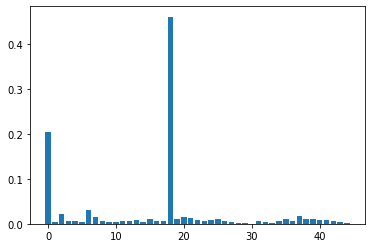

In [43]:
importance = dec_tree_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [44]:

random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [45]:
y_pred = random_forest_reg.predict(X_test)

In [46]:
error = median_absolute_error(y_test, y_pred)
print("${:,.02f}".format(error))

$16,419.58


In [47]:

model = xgboost.XGBRegressor()

In [48]:
X.shape, y.shape

((26107, 45), (26107,))

In [49]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
y_pred = model.predict(X_test)
error = median_absolute_error(y_test, y_pred)

In [51]:
print("${:,.02f}".format(error))

$15,295.09


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import median_absolute_error, make_scorer
ftwo_scorer = make_scorer(median_absolute_error, beta=2)

max_depth = [None, 2,4,6,8,10,12]

parameters = {"max_depth": max_depth}

regressor = xgboost.XGBRegressor()
gs = GridSearchCV(regressor, parameters, scoring=ftwo_scorer)
gs.fit(X, y)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [55]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = median_absolute_error(y_test, y_pred)
print("${:,.02f}".format(error))

$15,295.09


In [56]:
X.columns

Index(['YearsCodePro', 'Country_Australia', 'Country_Brazil', 'Country_Canada',
       'Country_France', 'Country_Germany', 'Country_India', 'Country_Israel',
       'Country_Italy', 'Country_Netherlands', 'Country_Norway',
       'Country_Poland', 'Country_Russian Federation', 'Country_Spain',
       'Country_Sweden', 'Country_Switzerland', 'Country_Turkey',
       'Country_United Kingdom of Great Britain and Northern Ireland',
       'Country_United States of America', 'EdLevel_Bachelor’s degree',
       'EdLevel_Less than a Bachelors', 'EdLevel_Master’s degree',
       'EdLevel_Post grad', 'Age_18-24 years old', 'Age_25-34 years old',
       'Age_35-44 years old', 'Age_45-54 years old', 'Age_55-64 years old',
       'Age_65 years or older', 'Age_Prefer not to say',
       'Age_Under 18 years old', 'Gender_Man', 'Gender_Non-binary',
       'Gender_Prefer not to say', 'Gender_Woman',
       'OrgSize_1,000 to 4,999 employees', 'OrgSize_10 to 19 employees',
       'OrgSize_10,000 or mor

In [59]:
with open('train_cols.pkl', 'wb') as file:
    pickle.dump(X.columns, file)

In [60]:
ui = pd.DataFrame({'Country':["United States of America"],'EdLevel':['Master’s degree'],'YearsCodePro':[6.0],'Age':['25-34 years old'],
             'Gender':['Man'],'OrgSize':['1,000 to 4,999 employees']})

In [61]:
ui_ohe = pd.get_dummies(ui)

In [62]:
ui_ohe

,YearsCodePro,Country_United States of America,EdLevel_Master’s degree,Age_25-34 years old,Gender_Man,"OrgSize_1,000 to 4,999 employees"
0,6.0,1,1,1,1,1


In [63]:
ui_ohe = ui_ohe.reindex(columns = X_train.columns, fill_value=0)

In [64]:
ui_ohe

,YearsCodePro,Country_Australia,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_India,Country_Israel,Country_Italy,Country_Netherlands,Country_Norway,Country_Poland,Country_Russian Federation,Country_Spain,Country_Sweden,Country_Switzerland,Country_Turkey,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,EdLevel_Bachelor’s degree,EdLevel_Less than a Bachelors,EdLevel_Master’s degree,EdLevel_Post grad,Age_18-24 years old,Age_25-34 years old,Age_35-44 years old,Age_45-54 years old,Age_55-64 years old,Age_65 years or older,Age_Prefer not to say,Age_Under 18 years old,Gender_Man,Gender_Non-binary,Gender_Prefer not to say,Gender_Woman,"OrgSize_1,000 to 4,999 employees",OrgSize_10 to 19 employees,"OrgSize_10,000 or more employees",OrgSize_100 to 499 employees,OrgSize_2 to 9 employees,OrgSize_20 to 99 employees,"OrgSize_5,000 to 9,999 employees",OrgSize_500 to 999 employees,OrgSize_I don’t know,"OrgSize_Just me - I am a freelancer, sole proprietor, etc."
0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [168]:
y_try = regressor.predict(ui_ohe)
y_try

array([129474.55], dtype=float32)

In [59]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education, "le_age": le_age, "le_gender": le_gender, "le_orgsize":le_orgsize}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [60]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]
le_age = data["le_age"]
le_gender = data["le_gender"]
le_orgsize = data["le_orgsize"]

In [169]:
with open('model.pkl', 'wb') as file:
    pickle.dump(regressor, file)